**Q 3. Linear Regression**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
from sklearn.metrics import r2_score

**Reading Data from CSV**


In [0]:
training_data = pd.read_csv('/content/drive/My Drive/smai_assignment2/Question-3/airfoil.csv',header=None)

Pandas is the most popular python library that is used for data analysis. It provides highly optimized performance with back-end source code is purely written in C or Python.

In [0]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(training_data, test_size=0.2)

In [0]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

**Converting to numpy**

Numpy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. Besides its obvious scientific uses, Numpy can also be used as an efficient multi-dimensional container of generic data

In [0]:
train=train.to_numpy()
test=test.to_numpy()
data_without_label = train[:,0:5].copy()
test_data_without_label = test[:,0:5].copy()


In [0]:
test_data_without_label.shape


(241, 5)

**Feature Scaling**

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units.

**MinMaxScaler:-**

Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set.

In [0]:
scaler = MinMaxScaler()
# scaler.fit(data_without_label)
data_without_label=scaler.fit_transform(data_without_label)
test_data_without_label=scaler.fit_transform(test_data_without_label)

In [0]:
train_label = train[:,[5]]
test_label = test[:,[5]]


## **Appending ones**
Since we are trying to fit the hyper-plane to represent our data. And to represent a hyperplane we have to append a columns having all one's

In [0]:
data_without_label=np.append(np.ones((len(data_without_label),1)),data_without_label,axis=1)
test_data_without_label=np.append(np.ones((len(test_data_without_label),1)),test_data_without_label,axis=1)

In [0]:
# //Q_got=np.random.rand(6,1)
Q_got=[1,1,1,1,1,1]
Q_got = np.asarray(Q_got)
Q_got = Q_got.reshape(6,1)
Q_got.shape




(6, 1)

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

**Linear Regression**

**Cost Function:-**

We need to minimize the cost function:

$ J(θ_1,θ_2)=(1/2m) ∑(h_0 x(i)−y(i))^2 $

Now we calculate the derivatives and have:

$ \frac{∂} {∂θ} J(θ_0,θ_1)=(1/m) ∑(h_θ(x(i))−y(i)) $ 

New theta will be:

$ θ_i = θ_i − α \frac{∂} {∂θ_i} J(θ_0,θ_1) $

**Mean squared error:**

It is simply the average of the square of the difference between the original values and the predicted values.


In [0]:



def linear_regression(iterations,learningRate,Q_new,m):
  final_cost_array = []
  iteration_array=[]
  for i in range(iterations):
    #print(i)
    predicted = data_without_label.dot(Q_new)
    # print(predicted.shape)
    error = predicted - train_label
    # print(error.shape)
    Q_got = np.dot(data_without_label.T,error)
    # data_without_label.T.dot(error)
    # print(Q_got)
    Q_new = Q_new - (1/m)*learningRate*Q_got
    
    cost = mean_squared_error(predicted,train_label)
    final_cost_array.append(cost)
    iteration_array.append(i)


    # print((1/(2*m))*(np.sum(error)**2))  
  
  
  return Q_new,iteration_array,final_cost_array





In [0]:
# from sklearn.metrics import mean_squared_error

iteration_array1=[]
final_cost_array1=[]

Q_got=np.random.rand(6,1)

Q_got,iteration_array1,final_cost_array1 = linear_regression(100000,.1,Q_got,len(data_without_label))


prediction = test_data_without_label.dot(Q_got)
print(prediction.shape)
print(test_label.shape)


# r2_score( train_label, prediction)
print("MSE:-",mean_squared_error(prediction,test_label))
print("rsquare:-",r2_score(test_label,prediction))
fig, ax = plt.subplots()
ax.plot(iteration_array1, final_cost_array1)
plt.show()


(241, 1)
(241, 1)
MSE:- 24.666222504303793
rsquare:- 0.5669944531694826


**2.Using appropriate plot show how number of iterations is affecting the mean squared error for above model under below given conditions:**


**a)Using 3 different initial regression coefficients (weights) for fixed value of learning parameter (All 3 in single plot).**

In [0]:



def linear_regression(iterations,learningRate,Q_new,m):
  final_cost_array = []
  iteration_array=[]
  for i in range(iterations):
    #print(i)
    predicted = data_without_label.dot(Q_new)
    # print(predicted.shape)
    error = predicted - train_label
    # print(error.shape)
    Q_got = np.dot(data_without_label.T,error)
    # data_without_label.T.dot(error)
    # print(Q_got)
    Q_new = Q_new - (1/m)*learningRate*Q_got
    
    cost = mean_squared_error(predicted,train_label)
    final_cost_array.append(cost)
    iteration_array.append(i)


    # print((1/(2*m))*(np.sum(error)**2))  
  
  
  return Q_new,iteration_array,final_cost_array





(241, 1)
(241, 1)
MSE:- 24.666222504303793
rsquare:- 0.5669944531694826
Theta-> 0 [[134.63922444]
 [-25.72677842]
 [ -9.47838643]
 [ -9.69587549]
 [  3.96905298]
 [ -7.7472546 ]]


(241, 1)
(241, 1)
MSE:- 24.666222504303793
rsquare:- 0.5669944531694826
Theta-> 1 [[134.63922444]
 [-25.72677842]
 [ -9.47838643]
 [ -9.69587549]
 [  3.96905298]
 [ -7.7472546 ]]


(241, 1)
(241, 1)
MSE:- 24.666222504303793
rsquare:- 0.5669944531694826
Theta-> 2 [[134.63922444]
 [-25.72677842]
 [ -9.47838643]
 [ -9.69587549]
 [  3.96905298]
 [ -7.7472546 ]]


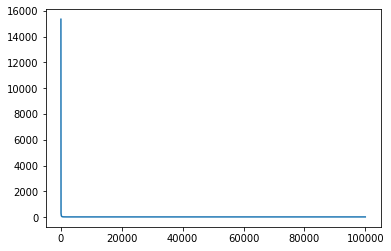

In [0]:
# from sklearn.metrics import mean_squared_error
for i in range(3):
  iteration_array1=[]
  final_cost_array1=[]

  Q_got=np.random.rand(6,1)

  Q_got,iteration_array1,final_cost_array1 = linear_regression(100000,.1,Q_got,len(data_without_label))


  prediction = test_data_without_label.dot(Q_got)
  print(prediction.shape)
  print(test_label.shape)


  # r2_score( train_label, prediction)
  print("MSE:-",mean_squared_error(prediction,test_label))
  print("rsquare:-",r2_score(test_label,prediction))
  print("Theta->",i,Q_got)
  fig, ax = plt.subplots()
  ax.plot(iteration_array1, final_cost_array1)
  plt.show()


**(b)Using 3 different learning parameters for some fixed initial regression coefficients. (All 3 in single plot)**

In [0]:



def linear_regression(iterations,learningRate,Q_new,m):
  final_cost_array = []
  iteration_array=[]
  for i in range(iterations):
    #print(i)
    predicted = data_without_label.dot(Q_new)
    # print(predicted.shape)
    error = predicted - train_label
    # print(error.shape)
    Q_got = np.dot(data_without_label.T,error)
    # data_without_label.T.dot(error)
    # print(Q_got)
    Q_new = Q_new - (1/m)*learningRate*Q_got
    
    cost = mean_squared_error(predicted,train_label)
    final_cost_array.append(cost)
    iteration_array.append(i)


    # print((1/(2*m))*(np.sum(error)**2))  
  
  
  return Q_new,iteration_array,final_cost_array





(241, 1)
(241, 1)
MSE:- 24.666222504303803
rsquare:- 0.5669944531694824
Fixed Theta-> 0 [[134.63922444]
 [-25.72677842]
 [ -9.47838643]
 [ -9.69587549]
 [  3.96905298]
 [ -7.7472546 ]]
learning_rate-> 1.0
(241, 1)
(241, 1)
MSE:- 24.666222504303793
rsquare:- 0.5669944531694826
Fixed Theta-> 1 [[134.63922444]
 [-25.72677842]
 [ -9.47838643]
 [ -9.69587549]
 [  3.96905298]
 [ -7.7472546 ]]
learning_rate-> 0.1
(241, 1)
(241, 1)
MSE:- 24.66606482479066
rsquare:- 0.5669972211694793
Fixed Theta-> 2 [[134.63897925]
 [-25.72652388]
 [ -9.47743026]
 [ -9.69560684]
 [  3.96899711]
 [ -7.74817528]]
learning_rate-> 0.01


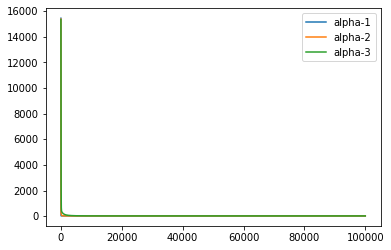

In [0]:
# from sklearn.metrics import mean_squared_error
Q_got=np.random.rand(6,1)
alpha = [1.0,0.1,0.01]
final_cost_array1=[1,1,1]
for i in  range(len(alpha)):
  iteration_array1=[]
  # final_cost_array1=[]

  Q_got=np.random.rand(6,1)

  Q_got,iteration_array1,final_cost_array1[i] = linear_regression(100000,alpha[i],Q_got,len(data_without_label))


  prediction = test_data_without_label.dot(Q_got)
  print(prediction.shape)
  print(test_label.shape)


  # r2_score( train_label, prediction)
  print("MSE:-",mean_squared_error(prediction,test_label))
  print("rsquare:-",r2_score(test_label,prediction))
  print("Fixed Theta->",i,Q_got)
  print("learning_rate->",alpha[i])
  # fig, ax = plt.subplots()
  # plt.plot(iteration_array1, final_cost_array1)
  # plt.show()
plt.plot( iteration_array1, final_cost_array1[0] )
plt.plot( iteration_array1, final_cost_array1[1] )
plt.plot( iteration_array1, final_cost_array1[2] )
plt.legend(['alpha-1', 'alpha-2', 'alpha-3'], loc='upper right')

plt.show()


If you want to apply regression on some dataset but one of it’s features has missing values under below given conditions, how will you approach the problem. (No need of Code Experimentation)

**(a) When 0-0.5% of values are missing of that feature.**

We can fill all missing values with appropriate way. Since 99.5% data is avilable we can use it to predict the best possible value of that missing cell. 

Guessing: Guess the missing value from 99.5% data which is avialble.

Average: Fill the missing value with average

**2) When 8-10% of values are missing of that feature:**

(a)Average:Take average if its a numerical data or else take mode if it is a categoriacal data

(b)Regression Substitution: You can use multiple-regression analysis to estimate a missing value.Regression substitution predicts the missing value from the other values

(c)Deletion:That row can be dropped

**3) When 60-70% of values are missing of that feature**

(a)Deletion: That whole column can be dropped
